<a href="https://colab.research.google.com/github/gustavofoltran/rosetta/blob/main/fastrelax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!pip install odfpy


In [27]:



import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!pip install odfpy




def main():
    score = 'https://raw.githubusercontent.com/gustavofoltran/rosetta/02ae3f80020e40f04a546a52b79c48343f3a4573/score.ods'
    df = pd.read_excel(score, skiprows=1, engine='odf', decimal=',')


    colunas_essenciais = ['dG_separated', 'total_score', 'packstat', 'hbonds_int', 'fa_rep', 'fa_sol', 'sc_value', 'ddg', 'bu', 'description']
    colunas_ascendentes = ['dG_separated', 'total_score', 'ddg', 'bu', 'fa_rep' ]
    colunas_decrescentes = ['packstat', 'hbonds_int', 'sc_value' ]

    for pontuação in colunas_ascendentes:

        df[f'rank_{pontuação}'] = df[pontuação].rank(ascending=True)

    for pontuação in colunas_decrescentes:
        df[f'rank_{pontuação}'] = df[pontuação].rank(ascending=False)

    ordem_final = [f'rank_{pontuação}' for pontuação in colunas_ascendentes + colunas_decrescentes]

    df['final'] = df[ordem_final].sum(axis=1)

    df_ranked_overall = df.sort_values(by='final', ascending=True)

    colunas_para_exibir = ['description','final']

    print(df_ranked_overall[colunas_para_exibir].head(10))



    #colocar numero, 1-100 para ser a classificação
    #para cada pbb, soma as notas e ve qual é a menor

    #talvez seja melhor filtrar por todos<10 (valor mínimo)


main()




       description  final  dG_separated  packstat  hbonds_int  total_score
97  1B41_0001_0098  576.5       -68.348     0.568           8    -1761.429
6   1B41_0001_0007  563.5       -68.348     0.583           8    -1761.429
98  1B41_0001_0099  561.5       -68.634     0.557           8    -1761.429
72  1B41_0001_0073  560.5       -68.348     0.584           8    -1761.429
90  1B41_0001_0091  558.5       -68.348     0.586           8    -1761.429
88  1B41_0001_0089  558.5       -68.544     0.579           8    -1760.714
74  1B41_0001_0075  552.5       -67.165     0.572           6    -1766.777
63  1B41_0001_0064  551.0       -68.634     0.579           8    -1761.429
57  1B41_0001_0058  551.0       -68.348     0.592           8    -1761.429
5   1B41_0001_0006  551.0       -68.348     0.592           8    -1761.429


In [ ]:

print(df.columns)

Index(['SCORE:', 'total_score', 'bu', 'complex_normalized', 'dG_cross',
       'dG_cross/dSASAx100', 'dG_separated', 'dG_separated/dSASAx100',
       'dSASA_hphobic', 'dSASA_int', 'dSASA_polar', 'ddg', 'delta_unsatHbonds',
       'dslf_fa13', 'fa_atr', 'fa_dun', 'fa_elec', 'fa_intra_rep',
       'fa_intra_sol_xover4', 'fa_rep', 'fa_sol', 'hbond_E_fraction',
       'hbond_bb_sc', 'hbond_lr_bb', 'hbond_sc', 'hbond_sr_bb', 'hbonds_int',
       'lk_ball_wtd', 'nres_all', 'nres_int', 'omega', 'p_aa_pp', 'packstat',
       'per_residue_energy_int', 'pro_close', 'rama_prepro', 'ref', 'sc_value',
       'side1_normalized', 'side1_score', 'side2_normalized', 'side2_score',
       'unsat', 'yhh_planarity', 'description'],
      dtype='object')


Carregando arquivo do GitHub...
Arquivo carregado com sucesso!

--- ANÁLISE CONSOLIDADA DOS 10 MELHORES MODELOS ---
Ordenando por 'dG_separated' (o principal indicador de afinidade de ligação)...

    dG_separated  total_score  packstat  hbonds_int   fa_rep    fa_sol  \
10       -70.279    -1763.852     0.591           8  493.684  1972.906   
12       -70.099    -1761.875     0.644           9  492.194  1989.769   
77       -70.069    -1761.875     0.628           9  492.194  1989.769   
34       -69.961    -1763.147     0.597           9  491.258  1992.466   
17       -69.932    -1761.997     0.649           8  493.947  1989.425   
61       -69.848    -1757.502     0.626           8  497.744  1992.397   
26       -69.444    -1763.304     0.609           7  494.060  1990.065   
1        -69.444    -1763.304     0.583           7  494.060  1990.065   
40       -69.399    -1762.199     0.631           8  491.394  1989.852   
52       -69.399    -1762.199     0.633           8  491.394  1

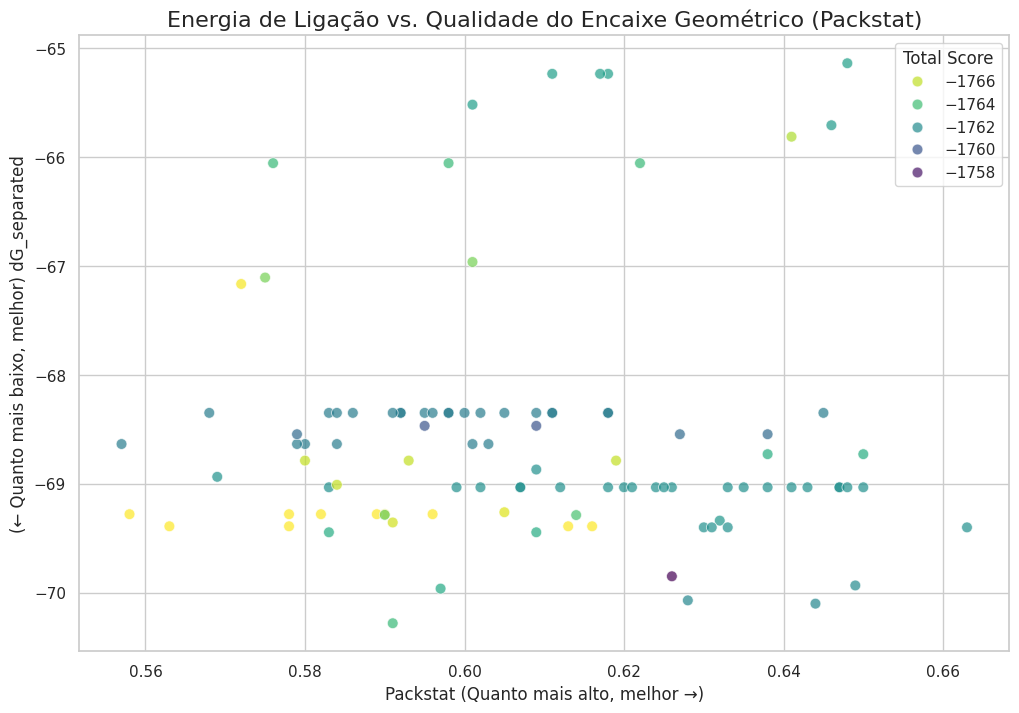


Análise do Gráfico:
O 'ponto ideal' neste gráfico está no canto inferior direito:
- Eixo Y baixo (dG_separated muito negativo)
- Eixo X alto (packstat próximo de 1.0)
Pontos escuros nessa região são os melhores candidatos gerais.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- PARTE 0: Carregar os Dados (seu código original) ---
# URL direta para o arquivo RAW no GitHub
url_raw = 'https://raw.githubusercontent.com/gustavofoltran/rosetta/02ae3f80020e40f04a546a52b79c48343f3a4573/score.ods'

print("Carregando arquivo do GitHub...")
try:
    df = pd.read_excel(url_raw, skiprows=1, engine='odf', decimal=',')
    print("Arquivo carregado com sucesso!\n")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o arquivo: {e}")
    # Interrompe a execução se o arquivo não puder ser carregado
    raise

# --- PARTE 1: Verificar as Métricas Principais para os Melhores Modelos ---
print("--- ANÁLISE CONSOLIDADA DOS 10 MELHORES MODELOS ---")
print("Ordenando por 'dG_separated' (o principal indicador de afinidade de ligação)...\n")

# Lista de colunas essenciais que você pediu para verificar
# Nota: A métrica de Shape Complementarity é a coluna 'sc_value'
colunas_essenciais = [
    'dG_separated',
    'total_score',
    'packstat',
    'hbonds_int',
    'fa_rep',
    'fa_sol',
    'sc_value',
    'ddg',
    'bu',
    'description'
]
# As colunas 'I_rms' e 'ligand_rms' não estavam na sua lista inicial,
# então vamos verificar se elas existem antes de tentar usá-las.
if 'I_rms' in df.columns:
    colunas_essenciais.append('I_rms')
if 'ligand_rms' in df.columns:
    colunas_essenciais.append('ligand_rms')

# Ordena o DataFrame pela energia de ligação (quanto mais negativo, melhor)
df_best = df.sort_values(by='dG_separated')

# Exibe a tabela resumo com as colunas mais importantes para os 10 melhores
# Usamos .loc para selecionar as linhas (head(10)) e as colunas (colunas_essenciais)
print(df_best.loc[:, colunas_essenciais].head(10))
print("\n" + "="*50 + "\n")


# --- PARTE 2: Verificar a Linha Mais Repetida (Modelo de Maior Sucesso) ---
print("--- ANÁLISE DE FREQUÊNCIA DOS MODELOS ---")
print("Verificando quais modelos aparecem mais vezes entre os 20 melhores...\n")

# Pega os 20 melhores modelos
top_20_models = df.sort_values(by='dG_separated').head(20)

# Conta a frequência de cada 'description' (cada modelo/mutação)
model_frequency = top_20_models['description'].value_counts()

print(model_frequency)
print("\n" + "="*50 + "\n")


# --- PARTE 3: Gerar um Gráfico (plt) para Análise Visual ---
print("--- VISUALIZAÇÃO GRÁFICA: Energia vs. Encaixe Geométrico ---")

# Configura o estilo e o tamanho do gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Cria o gráfico de dispersão (scatter plot)
# Eixo X: packstat (qualidade do encaixe, maior é melhor)
# Eixo Y: dG_separated (energia de ligação, menor é melhor)
scatter_plot = sns.scatterplot(
    data=df,
    x='packstat',
    y='dG_separated',
    hue='total_score',      # A cor dos pontos representa a energia total
    palette='viridis_r',    # Paleta de cores (do mais escuro/melhor ao mais claro/pior)
    s=60,                   # Tamanho dos pontos
    alpha=0.7               # Transparência dos pontos
)

# Adiciona títulos e legendas para clareza
scatter_plot.set_title('Energia de Ligação vs. Qualidade do Encaixe Geométrico (Packstat)', fontsize=16)
scatter_plot.set_xlabel('Packstat (Quanto mais alto, melhor →)', fontsize=12)
scatter_plot.set_ylabel('(← Quanto mais baixo, melhor) dG_separated', fontsize=12)
plt.legend(title='Total Score')

# Exibe o gráfico
plt.show()

print("\nAnálise do Gráfico:")
print("O 'ponto ideal' neste gráfico está no canto inferior direito:")
print("- Eixo Y baixo (dG_separated muito negativo)")
print("- Eixo X alto (packstat próximo de 1.0)")
print("Pontos escuros nessa região são os melhores candidatos gerais.")

In [6]:
import pandas as pd

# --- Carregar os Dados (mesmo código de antes) ---
url_raw = 'https://raw.githubusercontent.com/gustavofoltran/rosetta/02ae3f80020e40f04a546a52b79c48343f3a4573/score.ods'
try:
    df = pd.read_excel(url_raw, skiprows=1, engine='odf', decimal=',')
    print("Arquivo carregado com sucesso!\n")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o arquivo: {e}")
    raise

# --- Análise dos Campeões de Cada Categoria ---

# Dicionário com as métricas e como ordená-las
# True = ordem crescente (menor é melhor)
# False = ordem decrescente (maior é melhor)
metrics_to_analyze = {
    'dG_separated': True,
    'total_score': True,
    'ddg': True,
    'bu': True,
    'fa_rep': True,
    'packstat': False,
    'hbonds_int': False,
    'sc_value': False
}

# Colunas que queremos exibir na tabela de resultados para comparação
colunas_para_exibir = [
    'description',
    'dG_separated',
    'total_score',
    'packstat',
    'hbonds_int',
    'ddg',
    'bu',
    'fa_rep',
    'sc_value'
]

# Loop que passa por cada métrica, ordena e mostra os 5 melhores
for metric, is_ascending in metrics_to_analyze.items():

    # Define a direção da ordenação (crescente ou decrescente)
    sort_order_text = "Menor para o Maior" if is_ascending else "Maior para o Menor"

    print(f"--- Top 5 Candidatos por '{metric}' ({sort_order_text}) ---")

    # Ordena o DataFrame pela métrica atual
    df_sorted = df.sort_values(by=metric, ascending=is_ascending)

    # Exibe os 5 primeiros resultados, mostrando apenas as colunas importantes
    print(df_sorted[colunas_para_exibir].head())
    print("\n" + "="*70 + "\n")

Arquivo carregado com sucesso!

--- Top 5 Candidatos por 'dG_separated' (Menor para o Maior) ---
       description  dG_separated  total_score  packstat  hbonds_int     ddg  \
10  1B41_0001_0011       -70.279    -1763.852     0.591           8 -70.280   
12  1B41_0001_0013       -70.099    -1761.875     0.644           9 -70.099   
77  1B41_0001_0078       -70.069    -1761.875     0.628           9 -70.099   
34  1B41_0001_0035       -69.961    -1763.147     0.597           9 -69.961   
17  1B41_0001_0018       -69.932    -1761.997     0.649           8 -69.932   

    bu   fa_rep  sc_value  
10  11  493.684     0.695  
12   8  492.194     0.698  
77   8  492.194     0.698  
34  10  491.258     0.709  
17   8  493.947     0.713  


--- Top 5 Candidatos por 'total_score' (Menor para o Maior) ---
       description  dG_separated  total_score  packstat  hbonds_int     ddg  \
4   1B41_0001_0005       -69.278    -1766.914     0.578           7 -69.278   
9   1B41_0001_0010       -69.389    

In [ ]:
import pandas as pd

def analisar_metricas(df):


    # Dicionário que define as métricas e sua ordem ideal
    # True = crescente (menor é melhor)
    # False = decrescente (maior é melhor)
    metrics_to_analyze = {
        'total_score': True,
        'dG_separated': True,
        'ddg': True,
        'bu': True,
        'fa_rep': True,
        'packstat': False,
        'hbonds_int': False, # O nome correto da coluna é 'hbonds_int'
        'sc_value': False
    }

    # Colunas que queremos exibir na tabela de resultados para comparação
    colunas_para_exibir = [
        'description',
        'dG_separated',
        'packstat',
        'hbonds_int',
        'total_score',
        'ddg'
    ]

    # Loop que passa por cada métrica, ordena e mostra os 5 melhores
    for metric, is_ascending in metrics_to_analyze.items():

        # Define a direção da ordenação para o print
        sort_order_text = "Menor para o Maior" if is_ascending else "Maior para o Menor"

        print(f"--- Top 5 Candidatos por '{metric}' ({sort_order_text}) ---")

        # Ordena o DataFrame pela métrica atual com a direção correta
        df_sorted = df.sort_values(by=metric, ascending=is_ascending)

        # Exibe os 5 primeiros resultados
        print(df_sorted[colunas_para_exibir].head())
        print("\n" + "="*70 + "\n")

def main():
    """
    Função principal que carrega os dados e chama a função de análise.
    """
    print("Carregando arquivo de score do GitHub...")
    url_raw = 'https://raw.githubusercontent.com/gustavofoltran/rosetta/02ae3f80020e40f04a546a52b79c48343f3a4573/score.ods'

    try:
        # Carrega os dados para um DataFrame
        df = pd.read_excel(url_raw, skiprows=1, engine='odf', decimal=',')
        print("Arquivo carregado com sucesso!")

        # Chama a função de análise, passando o DataFrame carregado
        analisar_metricas(df)

    except Exception as e:
        print(f"Ocorreu um erro fatal: {e}")

# Este é o ponto de entrada padrão em Python.
# Ele garante que a função main() será executada quando você rodar o script.
if __name__ == "__main__":
    main()